# Daily Stopwatch Data Science: Week 6 DS Challenge from Insight

Note: this is a part of Insight Data Science. 

## Stage 1: Ask a question

My objective is to develop a model that predicts whether a biopsied breast cell is benign (not cancerous) or malignant (cancerous), given a set of attributes about the cell.

I measure the performance by...

## Stage 2: Get data

I get data from the data available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data). The following shows imports and variables:

In [80]:
#Set up the environment
import numpy as np                         #Numpy
import pandas as pd                        #Pandas
import matplotlib.pyplot as plt            #Plot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
%matplotlib inline 


In [41]:

# Set up data directory
DataDir = "C:/Users/Admin/Documents/data/"

# Here's an example of loading the CSV using Pandas's built-in HDF5 support:
import pandas as pd

df = pd.read_csv(DataDir + 'breast-cancer-wisconsin.data',header=None)

## Stage 3: Explore the data

Explore, Visualize, Clean, Transform, Feature engineering

First, data has no header. We need to make it up. In the problem, the info is given as follow:

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)

Let's rename the columns accordingly. Since all features are foreign to me, I will name them as X1 up to X9 (except ID and Class).

In [42]:
df.columns = ['ID','X1','X2','X3','X4','X5','X6','X7','X8','X9','y']

In [43]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,y
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [91]:
df.tail()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,y
694,776715,3,1,1,1,3,2,1,1,1,0.0
695,841769,2,1,1,1,2,1,1,1,1,0.0
696,888820,5,10,10,3,7,3,8,10,2,1.0
697,897471,4,8,6,4,3,4,10,6,1,1.0
698,897471,4,8,8,5,4,5,10,4,1,1.0


Let's transform value of y: 2 -> 0 and 4 -> 1 to follow the convention of the classification problem.

In [44]:
df['y'] = df['y']*0.5-1

I have run basic checks on data as follow ...

Let's explore data a bit. First, size and the number of each y's.

In [45]:
len(df), np.sum(df['y']==0), np.sum(df['y']==1)

(699, 458, 241)

The data is somewhat imbalanced, but not severely imbalanced.`

Next, let's check if we face a problem of missing values. Fortunately, there is no problem with that.

In [46]:
np.sum(df['X9'].isnull()) #Run for all columns

0

Next, let's check the distribution of each feature along with the relationship with y. We can do this visually since there are not many features anyway. We can see that all features are quite strong. (I don't why I can't see X6 though). It seems that the benign ones tend to have small feature values.

(array([  15.,    9.,   16.,   13.,   20.,    4.,    7.,   19.,    9.,  129.]),
 array([  1. ,   1.9,   2.8,   3.7,   4.6,   5.5,   6.4,   7.3,   8.2,
          9.1,  10. ]),
 <a list of 10 Patch objects>)

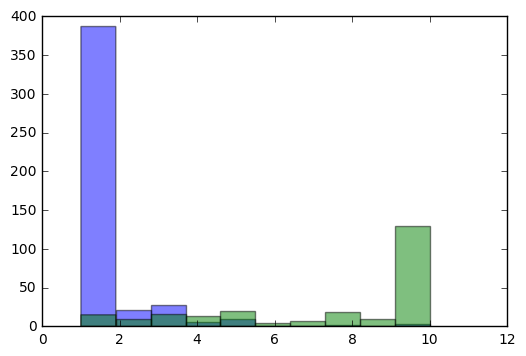

In [72]:
column_name = 'X6'
plt.hist(df[column_name][df['y']==0],alpha = 0.5)
plt.hist(df[column_name][df['y']==1],alpha = 0.5)

There is something wrong with X6. Other features are all numbers only X6 has '?'. Let's replace them with the mean of known values.

In [70]:
m = np.mean(df['X6'][df['X6']!='?'].map(lambda x: int(x)))

In [71]:
for i in range(0,len(df)):
    if df.loc[i,'X6'] == '?':
        df.loc[i,'X6'] = m
    else:
        df.loc[i,'X6'] = int(df.loc[i,'X6'])

It is suspicious that these features are highly correlated because of the visualization above. Let's check out the correlation among features.

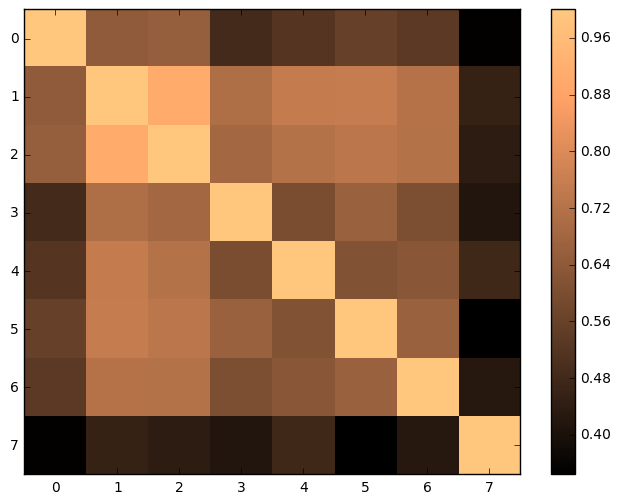

In [73]:
#Correlation matrix
CorrMatrix = df[['X1','X2','X3','X4','X5','X6','X7','X8','X9']].corr()
fig = plt.figure(figsize=(8,6))
ax1  = fig.add_subplot(111)

plt.imshow(CorrMatrix.T, cmap='copper', interpolation='nearest',aspect='auto')
plt.colorbar();

The feature X2 and X3 seems correlated. The rest is not strongly correlated. We can try PCA to see in detail.

In [90]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=9))])
pipeline.fit(df[['X1','X2','X3','X4','X5','X6','X7','X8','X9']])
pca.explained_variance_ratio_#pipeline.explained_variance_ratio_

array([ 0.68897023,  0.07271567,  0.06098953,  0.04436764,  0.03902387,
        0.0345756 ,  0.02528331,  0.02267603,  0.01139812])

We may throw away some features out, but it might not be worth. Just stick with all features then.

There is no feature engineering at this point.

## Stage 4: Model the data

I have prepared data for validation as follow: For simplicity, just do 70/30 train/test. Make sure that we have both 0 and 1 in both sets.

In [222]:
df_0 = df[df['y']==0]
df_1 = df[df['y']==1]

In [223]:
r = np.random.uniform(0,1, len(df_0))
train_0 = df_0[r<0.7]
test_0 = df_0[r>=0.7]
r = np.random.uniform(0,1, len(df_1))
train_1 = df_1[r<0.7]
test_1 = df_1[r>=0.7]

Note that it is not well balanced. Let's fix this issue later.

In [224]:
train = pd.concat([train_0, train_1])
test = pd.concat([test_0, test_1])

Let's start with a simple model with easy interpretation: **Logistic regression**.

In [225]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

X, y = train[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], train['y']
X = StandardScaler().fit_transform(X)

Model = LogisticRegressionCV(penalty='l2') #Equipped with built-in CV

m = Model.fit(X, y)

Xtest, ytest = test[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], test['y']
Xtest = StandardScaler().fit_transform(Xtest)

[m.score(X, y), m.score(Xtest, ytest)]

[0.96721311475409832, 0.976303317535545]

This is surprisingly good. Let's fix the problem of unbalanced training data by over sample the the data with 1.

In [226]:
len(df_0), len(df_1)

(458, 241)

We can add another p = (485-241)/241  portion of lines of data with 1.

In [227]:
p = (len(df_0)-len(df_1))*1.0/len(df_1)
print(p)

0.900414937759


In [228]:
r = np.random.uniform(0,1, len(train_1))
train_2 = train_1[r<p]

In [229]:
train = pd.concat([train_0, train_1, train_2])
test = pd.concat([test_0, test_1])

In [230]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

X, y = train[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], train['y']
X = StandardScaler().fit_transform(X)

Model = LogisticRegressionCV(penalty='l2') #Equipped with built-in CV

m = Model.fit(X, y)

Xtest, ytest = test[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], test['y']
Xtest = StandardScaler().fit_transform(Xtest)

[m.score(X, y), m.score(Xtest, ytest)]

[0.95968992248062013, 0.95734597156398105]

Next, let's try number of methods at once. Some of them are ensemble methods, say, random forest.

In [231]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [232]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

X, y = train[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], train['y']
X = StandardScaler().fit_transform(X)
Xtest, ytest = test[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], test['y']
Xtest = StandardScaler().fit_transform(Xtest)

for name, clf in zip(names, classifiers):
    clf.fit(X, y)
    print(name, clf.score(X, y), clf.score(Xtest, ytest))

('Nearest Neighbors', 0.9875968992248062, 0.94312796208530802)
('Linear SVM', 0.97054263565891474, 0.96208530805687209)
('RBF SVM', 1.0, 0.86729857819905209)
('Gaussian Process', 0.9751937984496124, 0.95734597156398105)
('Decision Tree', 0.98449612403100772, 0.91469194312796209)
('Random Forest', 0.98294573643410854, 0.93364928909952605)
('Neural Net', 0.9751937984496124, 0.95734597156398105)
('AdaBoost', 0.99069767441860468, 0.92417061611374407)
('Naive Bayes', 0.95968992248062013, 0.92890995260663511)
('QDA', 0.95193798449612399, 0.93364928909952605)


Here one can see that the complicated methods do not pay off well. The logistic regression already did the job.

One concern, however, is that the score used here is the mean accuracy. In this particular problem, we are more interested in other measures such as area under the curve, precision and recall. Let's dig into that by revisiting the logistic regression.

In [233]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

X, y = train[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], train['y']
X = StandardScaler().fit_transform(X)

Model = LogisticRegressionCV(penalty='l2') #Equipped with built-in CV

m = Model.fit(X, y)

Xtest, ytest = test[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], test['y']
Xtest = StandardScaler().fit_transform(Xtest)

[m.score(X, y), m.score(Xtest, ytest)]

[0.95968992248062013, 0.95734597156398105]

First, let's look at the confusion matrix.

In [234]:
def PrecisionAndRecall(XX,yy,model):
    result = pd.DataFrame(yy) 
    result['ypredict'] = model.predict(XX)
    TP = np.sum((result['y']==1)&(result['ypredict']==1))
    TN = np.sum((result['y']==0)&(result['ypredict']==0))
    FP = np.sum((result['y']==0)&(result['ypredict']==1))
    FN = np.sum((result['y']==1)&(result['ypredict']==0))
    precision = TP*1.0/(TP+FP)
    recall = TP*1.0/(TP+FN)
    return precision, recall

Validation

In [235]:
PrecisionAndRecall(X,y,m), PrecisionAndRecall(Xtest,ytest,m) 

((0.95770392749244715, 0.96352583586626139), (0.88461538461538458, 1.0))

Our linear model worked nicely. Note that we prefer recall to be high since capturing all cancers is important. That is, it is OK to have some false positive as long as we can capture all cancer cells. Let's see how precision and recall are for more sophisticated models.

In [236]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

X, y = train[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], train['y']
X = StandardScaler().fit_transform(X)
Xtest, ytest = test[['X1','X2','X3','X4','X5','X6','X7','X8','X9']], test['y']
Xtest = StandardScaler().fit_transform(Xtest)

for name, clf in zip(names, classifiers):
    clf.fit(X, y)
    score = clf.score(X, y)
    print(name, PrecisionAndRecall(X,y,clf), PrecisionAndRecall(Xtest,ytest,clf))

('Nearest Neighbors', (0.97626112759643913, 1.0), (0.85185185185185186, 1.0))
('Linear SVM', (0.9668674698795181, 0.9756838905775076), (0.89610389610389607, 1.0))
('RBF SVM', (1.0, 1.0), (0.71134020618556704, 1.0))
('Gaussian Process', (0.96996996996996998, 0.98176291793313075), (0.88461538461538458, 1.0))
('Decision Tree', (0.97050147492625372, 1.0), (0.7931034482758621, 1.0))
('Random Forest', (0.96745562130177509, 0.99392097264437695), (0.84146341463414631, 1.0))
('Neural Net', (0.96996996996996998, 0.98176291793313075), (0.88461538461538458, 1.0))
('AdaBoost', (0.98791540785498488, 0.99392097264437695), (0.8271604938271605, 0.97101449275362317))
('Naive Bayes', (0.94690265486725667, 0.9756838905775076), (0.8214285714285714, 1.0))
('QDA', (0.93313953488372092, 0.9756838905775076), (0.83132530120481929, 1.0))


Here one can see that more sophisticated models did not do a better job than the logistic regression. The last shot model is to "ensemble" all models together. We use the prediction to to vote. If vote is equal, we round it to 1 since we have a high recall.

In [237]:
BigVote = pd.DataFrame(m.predict(Xtest),columns = ['Logistic'])

In [238]:
for name, clf in zip(names, classifiers):
    clf.fit(X, y)
    BigVote[name] = clf.predict(Xtest)

In [250]:
result = pd.DataFrame(BigVote.mean(axis=1).map(lambda x: int(x>=0.5)), columns = ['ypredict'])
result['y'] = list(ytest)
TP = np.sum((result['y']==1)&(result['ypredict']==1))
TN = np.sum((result['y']==0)&(result['ypredict']==0))
FP = np.sum((result['y']==0)&(result['ypredict']==1))
FN = np.sum((result['y']==1)&(result['ypredict']==0))
precision = TP*1.0/(TP+FP)
recall = TP*1.0/(TP+FN)
precision, recall

(0.87341772151898733, 1.0)

It sounds good but might overkill. Let's use simply the logistic regression.

## Stage 5: Communicate the data

I have concluded that the logistic regression is the best model with following performance:

On the test set: accuracy 96%, precision 88%, recall 100%

Note: We HAVE perform cross-validation in the training data. It means that our model is quite resilient to overfitting.

In [251]:
m.coef_

array([[ 0.02109208,  0.02335282,  0.02341951,  0.01950902,  0.01830815,
         0.02392969,  0.02139421,  0.01933462,  0.01073013]])

The coefficients shows that the higher value in all features leads to a higher chance of cancer (malignant). 

**What's next?** We haven't invested our time on the area under curve. We also haven't thought about other ensemble methods like Boosting. It is also good to check where the classification goes wrong. Plotting may give us and idea how to go beyond a linear model in a data-driven way rather than trial and errors like we have done.